In [12]:
#Stacking for Classification
#In this section, we will look at using stacking for a classification problem.
#First, we can use the make_classification() function to create a synthetic binary classification problem with 1,000 examples and 20 input features.
#The complete example is listed below.
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
import pandas as pd
from sklearn import metrics

In [2]:
df = pd.read_csv('wine.csv')

In [5]:
df.isnull().sum()

Class                            0
 Alcohol                         0
 Malic acid                      0
 Ash                             0
 Alcalinity of ash               0
 Magnesium                       0
 Total phenols                   0
 Flavanoids                      0
 Nonflavanoid phenols            0
 Proanthocyanins                 0
 Color intensity                 0
 Hue                             0
 OD280/OD315 of diluted wines    0
 Proline                         0
dtype: int64

In [6]:
df.head()

Class   Alcohol   Malic acid   Ash   Alcalinity of ash   Magnesium  \
0      1     14.23         1.71  2.43                15.6         127   
1      1     13.20         1.78  2.14                11.2         100   
2      1     13.16         2.36  2.67                18.6         101   
3      1     14.37         1.95  2.50                16.8         113   
4      1     13.24         2.59  2.87                21.0         118   

    Total phenols   Flavanoids   Nonflavanoid phenols   Proanthocyanins  \
0            2.80         3.06                   0.28              2.29   
1            2.65         2.76                   0.26              1.28   
2            2.80         3.24                   0.30              2.81   
3            3.85         3.49                   0.24              2.18   
4            2.80         2.69                   0.39              1.82   

    Color intensity   Hue   OD280/OD315 of diluted wines   Proline  
0              5.64  1.04                           3.92      1065  
1              4.38  1.05                           3.40      1050  
2              5.68  1.03                           3.17      1185  
3              7.80  0.86                           3.45      1480  
4              4.32  1.04                           2.93       735

In [7]:
df.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [8]:
df.shape

(178, 14)

In [3]:
# Separate Atribut and Labels
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [10]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [11]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>lr 0.951 (0.053)
>knn 0.710 (0.094)
>cart 0.890 (0.078)
>svm 0.687 (0.096)
>bayes 0.978 (0.037)


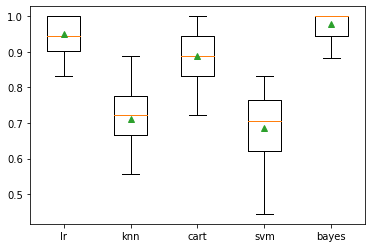

In [12]:
# define dataset
# X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [13]:
#STACKING
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [14]:
def get_modelstacking():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

>lr 0.951 (0.053)
>knn 0.710 (0.094)
>cart 0.889 (0.090)
>svm 0.687 (0.096)
>bayes 0.978 (0.037)
>stacking 0.964 (0.047)


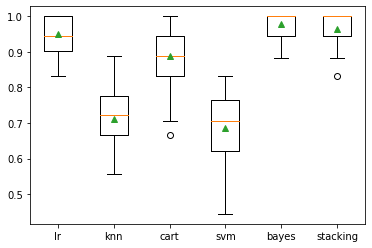

In [15]:
from sklearn.ensemble import StackingClassifier

# evaluate a give model using cross-validation
def evaluate_model_stacking(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# get the models to evaluate
models = get_modelstacking()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model_stacking(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
bagging_svm = BaggingClassifier(base_estimator=SVC(),random_state=42).fit(X_train,y_train)
bagging_knn = BaggingClassifier(KNeighborsClassifier(),random_state=42).fit(X_train,y_train)
bagging_decisionTree = BaggingClassifier(DecisionTreeClassifier(), random_state=42).fit(X_train,y_train)
bagging_logisticRegression = BaggingClassifier(LogisticRegression(),random_state=42).fit(X_train,y_train)
bagging_NaiveBayes = BaggingClassifier(GaussianNB(),random_state=42).fit(X_train,y_train)

# 
predict_bagging_svm = bagging_svm.predict(X_test)
predict_bagging_knn = bagging_knn.predict(X_test)
predict_decisionTree = bagging_decisionTree.predict(X_test)
predict_logisticRegression = bagging_logisticRegression.predict(X_test)
predict_NaiveBayes = bagging_NaiveBayes.predict(X_test)

In [22]:
# from sklearn.metrics import f1_score


print(f"f1 score Bagging SVM: {metrics.f1_score(y_test, predict_bagging_svm, average='weighted')}") 
print(f"f1 score Bagging KNN: {metrics.f1_score(y_test, predict_bagging_knn, average='weighted')}") 
print(f"f1 score Bagging Logistic Regression: {metrics.f1_score(y_test, predict_logisticRegression, average='weighted')}") 
print(f"f1 score Bagging Naive Bayes: {metrics.f1_score(y_test, predict_NaiveBayes, average='weighted')}") 

f1 score Bagging SVM: 0.7085671530115975
f1 score Bagging KNN: 0.7293567761309696
f1 score Bagging Logistic Regression: 0.9814930627938757
f1 score Bagging Naive Bayes: 1.0


In [27]:
print(f"Akurasi Bagging SVM: {metrics.accuracy_score(y_test, predict_bagging_svm)}") 
print(f"Akurasi Bagging KNN: {metrics.accuracy_score(y_test, predict_bagging_knn)}") 
print(f"Akurasi Bagging Logistic Regression: {metrics.accuracy_score(y_test, predict_logisticRegression)}") 
print(f"Akurasi Bagging Naive Bayes: {metrics.accuracy_score(y_test, predict_NaiveBayes)}")

Akurasi Bagging SVM: 0.7037037037037037
Akurasi Bagging KNN: 0.7222222222222222
Akurasi Bagging Logistic Regression: 0.9814814814814815
Akurasi Bagging Naive Bayes: 1.0


In [31]:
# Bagging Pada Naive Bayes Memperoleh Hasil Terbaik
print(metrics.confusion_matrix(y_test, predict_NaiveBayes))

[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [28]:
# Boosting
# GradientBoosting
# AdaBoost
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [32]:
gradient_model= GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
adaBoost_model = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
pred_gradientModel = gradient_model.predict(X_test)
pred_adaBoostModel = adaBoost_model.predict(X_test)

In [36]:
print(f"f1 score model Gradient Boosting model: {metrics.f1_score(y_test, pred_gradientModel, average='weighted')}")
print(f"Skor akurasi model Gradient Boosting model: {metrics.accuracy_score(y_test, pred_gradientModel)}")
print("=========================")
print(f"f1 score model Ada Boost model: {metrics.f1_score(y_test, pred_adaBoostModel, average='weighted')}")
print(f"Skor akurasi model Ada Boost model: {metrics.accuracy_score(y_test, pred_adaBoostModel)}")

f1 score model Gradient Boosting model: 0.9061065943992773
Skor akurasi model Gradient Boosting model: 0.9074074074074074
f1 score model Ada Boost model: 0.9245135111801778
Skor akurasi model Ada Boost model: 0.9259259259259259
